### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- exploring the structure using decision trees (Week 2)
- exploring clusters in customer behaviour (Week 3)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 4)
- loading, transforming and visualising data in R (Week 5)
- statistical analysis and modelling in R (Week 6)

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and goodness of fit metrics to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

# 1. Checking shape and data types in dataframe.

def inspect_df(df):
    
    print("Shape of the DataFrame:")
    print(df.shape)
    print("Data types of the DataFrame columns")
    print(df.dtypes)

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [3]:
reviews.tail()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                             summary  
1995  The perfect word game for mixed ages (with Mom  
1996                                       Super fun  
1997                                      Great Game  
1998                                      Four Stars  
1999                                  Love this game

In [4]:
# Using inspect_df function 
inspect_df(reviews)

Shape of the DataFrame:
(2000, 11)
Data types of the DataFrame columns
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


In [5]:
# Determine descriptive statistics and metadata
reviews.describe()
reviews.info()

# Checking columns names
reviews.columns.values.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'language',
 'platform',
 'product',
 'review',
 'summary']

In [6]:
# Checking missing values
reviews_missing_values = reviews[reviews.isna().any(axis=1)]

# Showing rows with missing values.
reviews_missing_values.shape

(0, 11)

In [7]:
# Showing duplicates
reviews_duplicates = reviews.duplicated()

print(reviews_duplicates)
print( "Sum of duplicates")
print(reviews_duplicates.sum())


0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool
Sum of duplicates
0


In [8]:
# Show all duplicate rows
reviews_duplicate_rows = reviews_duplicates[reviews_duplicates.duplicated(keep=False)]

print(reviews_duplicate_rows)
print( "Sum of duplicated rows")
print(reviews_duplicate_rows.sum())

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool
Sum of duplicated rows
0


### Observations: No missing values or duplicates

In [23]:
# Basic descriptive statistics.

# Get descriptive statistics for all columns.
descriptive_stats_all = reviews.describe(include='all')
print(descriptive_stats_all)

        gender          age  renumeration  spending_score  loyalty_points  \
count     2000  2000.000000   2000.000000     2000.000000     2000.000000   
unique       2          NaN           NaN             NaN             NaN   
top     Female          NaN           NaN             NaN             NaN   
freq      1120          NaN           NaN             NaN             NaN   
mean       NaN    39.495000     48.079060       50.000000     1578.032000   
std        NaN    13.573212     23.123984       26.094702     1283.239705   
min        NaN    17.000000     12.300000        1.000000       25.000000   
25%        NaN    29.000000     30.340000       32.000000      772.000000   
50%        NaN    38.000000     47.150000       50.000000     1276.000000   
75%        NaN    49.000000     63.960000       73.000000     1751.250000   
max        NaN    72.000000    112.340000       99.000000     6847.000000   

       education       product   review     summary  
count       2000   20

## 2. Drop columns

In [15]:
# Drop unnecessary columns.
reviews = reviews.drop(columns=['language', 'platform'])

# View column names.
print(reviews)

KeyError: "['language', 'platform'] not found in axis"

## 3. Rename columns

In [78]:
# Rename columns
reviews = reviews.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})

# View column names.
print(reviews)

      gender  age  renumeration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0      

## 4. Save the DataFrame as a CSV file

In [84]:
# Create a CSV file as output.
reviews.to_csv('modified_reviews.csv', index=False)

In [85]:
# Import new CSV file with Pandas.
new_reviews = pd.read_csv('modified_reviews.csv')

# View DataFrame.
new_reviews.head()

gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [86]:
# Rename columns
new_reviews = new_reviews.rename(columns={
    'renumeration': 'remuneration'
})

# Display the updated DataFrame
print(new_reviews)

      gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0      

## 5. Linear regression

### 5a) spending vs loyalty

In [87]:
# Define independent variable.
x = new_reviews['spending_score'].values.reshape(-1, 1) 

# Define dependent variable.
y = new_reviews['loyalty_points'].values.reshape(-1, 1) 

# Create model and print summary of metrics.

# Import the necessary package.
from sklearn.linear_model import LinearRegression

# Specify the model.
lm = LinearRegression()

# Fit the model.
lm.fit(x, y) 

LinearRegression()

### Split the data set

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)

### Run a linear equation

In [89]:
# Extract the predicted values.

# Run linear regression model.
lr = LinearRegression()

# Fit the model on the training data.
lr.fit(x_train, y_train)

# Predict is used for predicting on the x_test.
y_pred = lr.predict(x_test)

# View the output.
y_pred

array([[  48.37264243],
       [2431.12031027],
       [2265.65172222],
       [1305.93391157],
       [1438.308782  ],
       [1769.24595809],
       [ 246.93494809],
       [2331.83915744],
       [1868.52711092],
       [2927.5260744 ],
       [1570.68365244],
       [1537.58993483],
       [1339.02762918],
       [1206.65275874],
       [ 346.21610091],
       [1703.05852287],
       [1107.37160591],
       [ 280.02866569],
       [ 875.71558265],
       [  81.46636004],
       [1471.40249961],
       [ 478.59097135],
       [ 478.59097135],
       [1372.12134678],
       [1769.24595809],
       [1537.58993483],
       [2894.43235679],
       [ 776.43442983],
       [ 180.74751287],
       [2795.15120396],
       [ 941.90301787],
       [ 313.1223833 ],
       [ 246.93494809],
       [1438.308782  ],
       [1603.77737005],
       [1636.87108765],
       [1405.21506439],
       [1736.15224048],
       [1636.87108765],
       [1405.21506439],
       [ 875.71558265],
       [1868.527

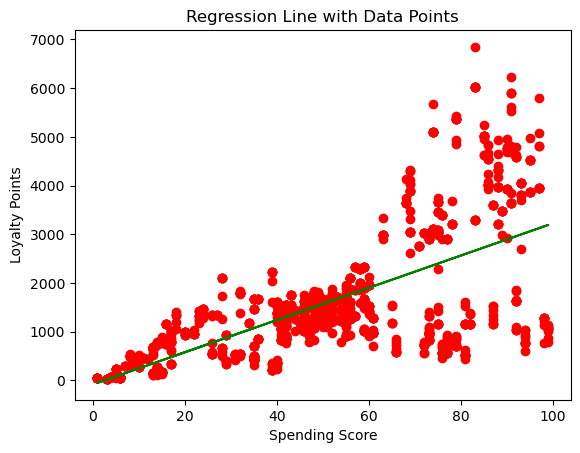

In [90]:
# Plot the graph with a regression line.#

# Visualise the training set.
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.title('Regression Line with Data Points')
plt.show()

#### Observations: This plot shows the data points and the regression line fitted on the training set. It fits well at the beggining and than above the value ' 60' of  spending score it spreads wider. This can suggest heteroscedasticity where variability of the errors increases across the range of predictor values.

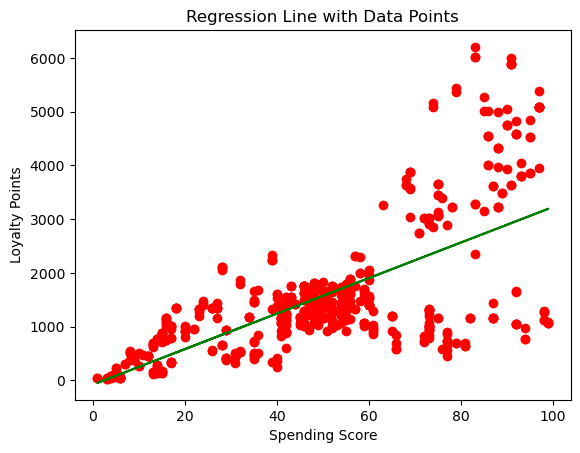

In [91]:
# Visualise the test set.
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, lr.predict(x_train), color = 'green')
plt.xlabel('Spending Score')
plt.ylabel('Loyalty Points')
plt.title('Regression Line with Data Points')

plt.show()

#### Observations: This plot shows the data points from the test set and the regression line fitted on the training set. Shows the model's performance on new, unseen data. It confirms observations from the previous visualistion.

### Correlation

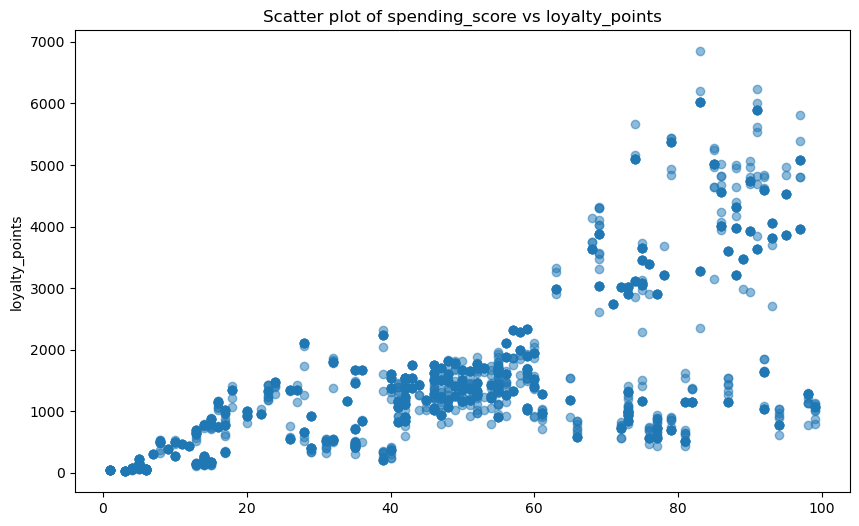

Correlation: 0.6723101119155436


In [92]:
def corr_plt(data = new_reviews, predictor = 'spending_score', target = 'loyalty_points'):
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(new_reviews[predictor], new_reviews[target], alpha=0.5) 
    plt.ylabel(target)
    title = 'Scatter plot of '+predictor+' vs '+target
    plt.title(title)
    plt.show()
    
    # Calculate the correlation
    correlation = new_reviews[predictor].corr(new_reviews[target])
    
    print(f'Correlation: {correlation}')


corr_plt(new_reviews, 'spending_score', 'loyalty_points')

#### Observations: Correlation of 0.672 suggests a moderately strong positive relationship. It's not perfect, but it is significant enough to indicate that changes in spending_score are associated with changes in loyalty_points.

### Using polyfit

In [93]:
# Polyfit is good for simple linear regression (only one variable)
reg = np.polyfit(new_reviews['spending_score'], new_reviews['loyalty_points'], deg = 1)

# Add a trendline to visualize the linear regression
# Use the NumPy polyval method, and specify the regression and the independent variable
trend = np.polyval(reg, new_reviews['spending_score'])

In [94]:
# New spending_score values for which we want to predict charges
new_spending_score_values = np.array([110, 120, 130])  # Example spending_score values

# Predicting charges for new spending_score values using the polynomial coefficients
future_predictions = np.polyval(reg, new_spending_score_values)

# Display the future predictions
for spending_score, loyalty_points in zip(new_spending_score_values, future_predictions):
    print(f'Predicted charge for spending_score {spending_score}: {loyalty_points}')

Predicted charge for spending_score 110: 3561.7335955203794
Predicted charge for spending_score 120: 3892.3505281071093
Predicted charge for spending_score 130: 4222.967460693839


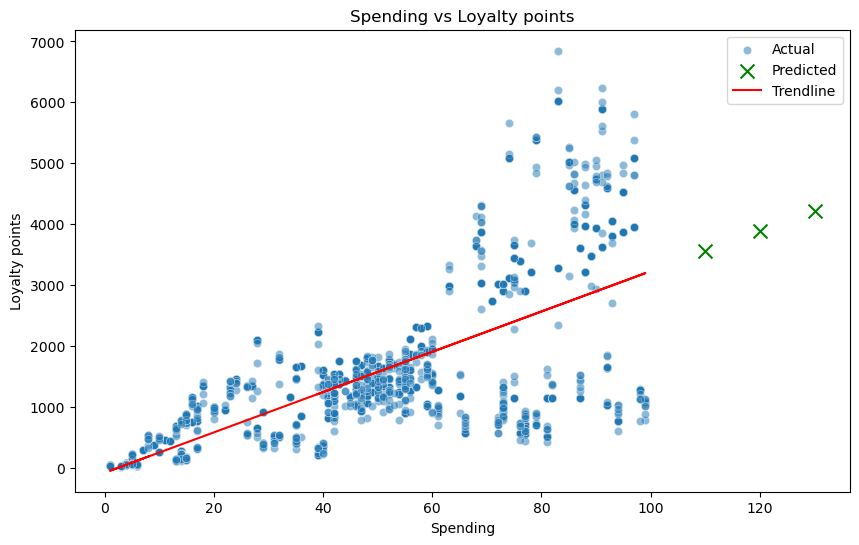

In [95]:
# Scatter plot with old and new data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=new_reviews['spending_score'], y=new_reviews['loyalty_points'], alpha=0.5, label='Actual')
plt.scatter(new_spending_score_values, future_predictions, color='green', marker='x', s=100, label='Predicted')

# Add the trendline for the combined data
plt.plot(new_reviews['spending_score'], trend, color='red', label='Trendline')

plt.xlabel('Spending')
plt.ylabel('Loyalty points')
plt.title('Spending vs Loyalty points')
plt.legend()

# Show the plot
plt.show()

### Residual Plot

In [96]:
# Add a constant term to the reg model
# FYI, most libraries add this in automatically, but OLS doesn't. It's just so the model doesn't create a reg line that runs through 0,0 i.e regression line to have a non-zero intercept
X = sm.add_constant(x)

# Fit the model
model = sm.OLS(y, x).fit()

# Summary of the model
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                              7156.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):                        0.00
Time:                        12:05:12   Log-Likelihood:                         -16552.
No. Observations:                2000   AIC:                                  3.311e+04
Df Residuals:                    1999   BIC:                                  3.311e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

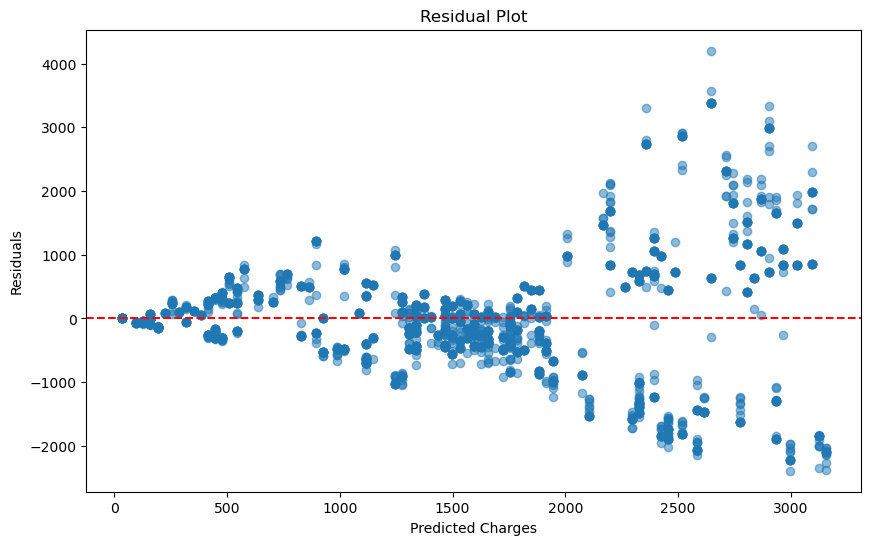

In [97]:
# Make predictions on the entire dataset `x`
predictions = model.predict(x)

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, model.resid, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--') #adds a horizontal line at y=0 represents the zero residual line
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

Funnel Shape (Increasing Spread): The plot shows an increasing spread of residuals as the predicted charges increase. This suggests heteroscedasticity, where the variance of residuals increases with the level of predicted charges.

### Template questions

In [98]:
# Extract the estimated parameters.
# Print the intercept value.
print("Intercept value: ", lr.intercept_) 

# Print the coefficient value.
print("Coefficient value: ", lr.coef_)

Intercept value:  [-84.002228]
Coefficient value:  [[33.09371761]]


In [99]:
# Set the X coefficient and the constant to generate the regression table.

# Extract the coefficients and intercept
intercept = lr.intercept_[0]
coefficient = lr.coef_[0][0]

# Create the regression table
regression_table = pd.DataFrame({
    'Term': ['Intercept', 'spending_score'],
    'Coefficient': [intercept, coefficient]
})
# View the output.
print("Regression Table:")
print(regression_table)

Regression Table:
             Term  Coefficient
0       Intercept   -84.002228
1  spending_score    33.093718


### Observations: 
The intercept represents the expected value of loyalty_points when spending_score is 0. In this context, an intercept of -84.002228 suggests that if a customer has a spending score of 0, the model predicts their loyalty points would be -84.002228. While this doesn't make practical sense (as loyalty points can't be negative), it is an artifact of the linear model. 
The negative intercept may not be meaningful in practical terms since it falls outside the range of observed data, indicating the starting point of the regression line when spending_score is zero.
The coefficient represents the change in loyalty_points for a one-unit increase in spending_score, holding all other variables constant. In this case, a coefficient of 33.093718 indicates that for each additional unit of spending score, the model predicts an increase of 33.093718 in loyalty points.The model indicates a significant positive relationship between spending score and loyalty points.
This suggests that as customers spend more (as reflected by a higher spending score), their loyalty points increase significantly.

In [100]:
# Create and fit the linear regression model
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Extract the standard errors
standard_errors = model.bse

# Print the standard errors
print("Standard Errors:")
print(standard_errors)

Standard Errors:
[55.74111313  0.98205897]


#### Standard Error: 55.74111313 indicates a high variability in the intercept estimate, suggesting that the intercept might not be estimated with high precision.

### 5b, 5c) remuneration and age vs loyalty

In [103]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Define independent variable.
x = new_reviews[['remuneration', 'age']] 
# Define dependent variable.
y = new_reviews['loyalty_points'] 

# Specify the model.
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x, y)

LinearRegression()

In [104]:
# Split the data into training = 0.7 and testing = 0.3 subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=42)

### Evaluate Model Performance

In [105]:
# Predictions on the test set
y_pred_test = mlr.predict(x_test)

y_pred_test

array([ 655.99045581, 2126.27323968, 1976.5320685 , 1733.09753579,
       1525.3101763 , 1253.27306764, 2087.78665134,  609.30192794,
       1355.48467452, 1870.37764477, 1129.29505729, 1592.39934057,
       1773.84486812, 2711.09478931, 2358.66641775, 1490.50403951,
       2068.80572249, 1856.49687501,  544.47350766,  659.40854204,
       1380.0904931 ,  793.84923591, 2841.59266632, 1431.61681476,
       1229.50828549, 1708.75408252, 2550.3122635 , 2281.95560639,
       3118.15126296,  800.94777369,  753.10190358, 2138.73430187,
       2378.48838304, 1650.7078942 , 1387.4513962 , 1076.92769921,
       1167.51928032, 1476.04459863, 1501.54539415, 1104.95160402,
       1949.92787124, 1285.55609513, 1128.45402086, 2736.85795014,
       3303.27724205,  669.87122556, 1650.7078942 , 1525.3101763 ,
       1188.44464736, 1042.38392773, 2727.23630306, 1094.48892051,
       1020.87988957,  430.95818083, 1595.501121  ,  795.84761459,
        992.85598475, 2801.10769931, 2664.66862676, 2187.42120

### Evaluate Model Using Metrics

In [106]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error:', mae)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred_test)
print('Mean Squared Error:', mse)

# Calculate root mean squared error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 738.5814981583545
Mean Squared Error: 1091332.044216473
Root Mean Squared Error: 1044.6683895937854


In [110]:
# Extract the estimated parameters.
# Checking the value of R-squared, intercept and coefficients.
# Define and train the model
multi = LinearRegression()
multi.fit(x_train, y_train)

print("R-squared: ", multi.score(x, y))
print("Intercept: ", multi.intercept_)
print("Coefficients:")

list(zip(x, multi.coef_))

R-squared:  0.3801329601227281
Intercept:  70.79482811191997
Coefficients:


[('remuneration', 35.4882427082382), ('age', -4.4927352554509)]

### Training and testing subsets with MLR

In [111]:
# Create train and test data sets.
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [112]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector.
Y_pred = model.predict(sm.add_constant(x_test)) 

# Call a summary of the model.
print_model = model.summary()

# Print the summary.
print(print_model)  

                            OLS Regression Results                            
Dep. Variable:         loyalty_points   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.448
Method:                 Least Squares   F-statistic:                     1299.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):          1.09e-208
Time:                        12:08:32   Log-Likelihood:                -13248.
No. Observations:                1600   AIC:                         2.650e+04
Df Residuals:                    1598   BIC:                         2.651e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -81.6222     52.028     -1.569      0.1

Standard errors: as above 

### Check for multicollinearity with Python

In [116]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming x_train is already defined as a DataFrame.
# Add a constant to the model (intercept term).
x_temp = sm.add_constant(x_train)

# Ensure x_temp is a DataFrame
if not isinstance(x_temp, pd.DataFrame):
    x_temp = pd.DataFrame(x_temp)

# Create an empty DataFrame to hold VIF values
vif = pd.DataFrame()

# Calculate VIF for each feature
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.shape[1])]

# Create the feature columns
vif['features'] = x_temp.columns

# Print the VIF values rounded to two decimal points
print(vif.round(2))

   VIF Factor  features
0        4.75         0
1        1.00         1


### Observation: VIF values of 1.00 for both remuneration and age indicate that these variables do not suffer from multicollinearity with each other or any other variables in the model. This is good because it suggests these variables can be interpreted independently in the regression model.

In [117]:
import statsmodels.stats.api as sms

# Determine heteroscedasticity.
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [118]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 488.2543643500778, 'LM Test p-value': 3.416991655721139e-108, 'F-stat': 701.8066446245184, 'F-test p-value': 1.6737083808687683e-128}


### Residuals

C:\Users\Kasia\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


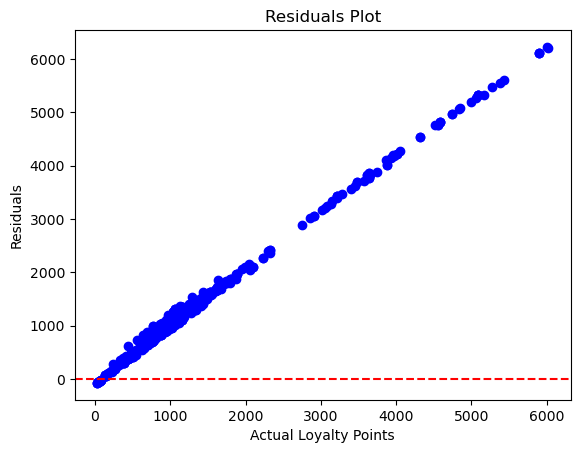

In [119]:
# Calculate residuals
residuals = y_test - mlr.predict(x_test)

# Plot residuals
plt.scatter(y_test, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Loyalty Points')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

### Assumptions:

C:\Users\Kasia\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


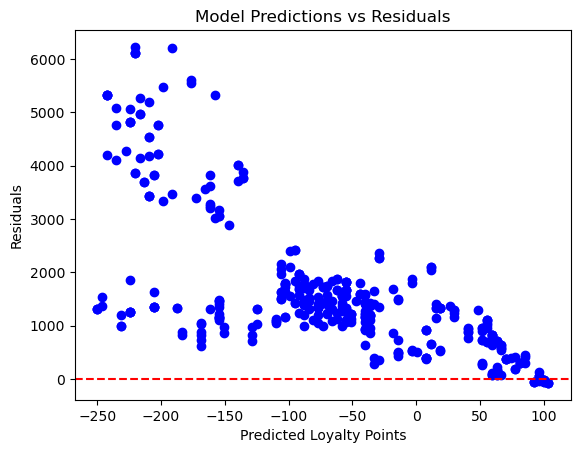

In [120]:
# Make predictions on the test set
y_pred = mlr.predict(x_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot model predictions and residuals
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel('Predicted Loyalty Points')
plt.ylabel('Residuals')
plt.title('Model Predictions vs Residuals')
plt.show()

A cone-like shape is a sign of heteroscedasticity (see image), indicating that variability of a variable is unequal across the values. However, residuals need to be equal across the regression line.

## 6. Observations and insights

***Your observations here...***






Simple linear reggresion model suggest that spending score has strong correlation with loyalty points. However, when trying to create predictions, the residuals value is quite high and this suggests higher possibility of occuring an error. In muliple linear regression we observed that remuneration and age are also corelated with loyalty points and these variables can be interpreted independently in the regression model.

# Week 2 assignment: Exploring the structure using decision trees.

The team wants you to use decision trees to attempt to better understand the structure found in the data. You need to grow and prune a decision tree regressor and then visualise and interpret the output.
Make sure to comment on the potential usefulness in decision-making processes and your observations regarding the model.

## Instructions
1. Prepare the data for creating your decision tree. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame with the appropriate columns.
        1. Specify that loyalty points is the target variable (Y) and should be excluded from your input data.
        2. Specify X for the independent variables and y as the dependent variable. Therefore, df\[cols\] will be the independent variables and the column containing loyalty points the dependent variable.
        3. Explore the new DataFrame. 
2. Split the data set into a train and test sets for both X and y at a 70:30 ratio. As previously, random_state=42.
3. Create a decision tree regressor to explore the impact of other features on the loyalty points.
    1. Import the DecisionTreeRegressor class from the sklearn.tree library. 
    2. Create a variable (e.g. regressor) to store the DecisionTreeRegressor() class. (As previously, random_state=42.).
    3. Fit the regressor object to the data set with the fit() function.
    4. Remember to prune your tree using basic pruning strategies and compare the performance before and after applying the pruning strategy.
    5. Plot the final decision tree.
4. Fit a final model and interpret the output.
    1. Justify your selection of pruning strategy implemented and interpret the output.
    2. Evaluate the usefulness of the obtained result and interpret the tree and how it could be used to inform business decisions in the organisation.
5. Summarise (150–200 words) the most important business insights, anything you would like to explore further, and suggested future actions.
 
Back up your work to a safe location. This will allow you to revert to a previous state in the case of making a mistake in the code or deleting a section by mistake. (A simple way of doing this is to save or email a compressed version to yourself at frequent intervals.)


## 1. Load and prepare the data

In [121]:
# Import all the necessary packages
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree,  DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Settings for the notebook.
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [122]:
# Create your new DataFrame.
df2 = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
df2.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [123]:
# Check the column names of the DataFrame
print(df2.columns)

# Drop unnecessary columns if they exist
columns_to_drop = ['review', 'summary']
existing_columns_to_drop = [col for col in columns_to_drop if col in df2.columns]
df2 = df2.drop(columns=existing_columns_to_drop)

# View the updated DataFrame
print(df2)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')
      gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998 

In [124]:
# Rename columns
df2 = df2.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})

# View column names.
print(df2)

      gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

     language platform  product  
0          EN      Web      453  
1      

In [125]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   language        2000 non-null   object 
 7   platform        2000 non-null   object 
 8   product         2000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


### Encoding Categorical Variables

In [126]:
# Encode categorical variables using get_dummies
# remember, leave the numerical columns
categorical_cols = ['gender', 'education', 'language', 'platform']
df2 = pd.get_dummies(df2, columns=categorical_cols, drop_first=True)

In [127]:
df2.head()

age  remuneration  spending_score  loyalty_points  product  gender_Male  \
0   18         12.30              39             210      453         True   
1   23         12.30              81             524      466         True   
2   22         13.12               6              40      254        False   
3   25         13.12              77             562      263        False   
4   33         13.94              40             366      291        False   

   education_PhD  education_diploma  education_graduate  \
0          False              False                True   
1          False              False                True   
2          False              False                True   
3          False              False                True   
4          False              False                True   

   education_postgraduate  
0                   False  
1                   False  
2                   False  
3                   False  
4                   False

In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     2000 non-null   int64  
 1   remuneration            2000 non-null   float64
 2   spending_score          2000 non-null   int64  
 3   loyalty_points          2000 non-null   int64  
 4   product                 2000 non-null   int64  
 5   gender_Male             2000 non-null   bool   
 6   education_PhD           2000 non-null   bool   
 7   education_diploma       2000 non-null   bool   
 8   education_graduate      2000 non-null   bool   
 9   education_postgraduate  2000 non-null   bool   
dtypes: bool(5), float64(1), int64(4)
memory usage: 88.0 KB


In [129]:
# Checikng missing values

print(df2.isnull().sum())

age                       0
remuneration              0
spending_score            0
loyalty_points            0
product                   0
gender_Male               0
education_PhD             0
education_diploma         0
education_graduate        0
education_postgraduate    0
dtype: int64


### Define the features

In [130]:
# Specify Y.
y = df2['loyalty_points'] # just our target variable

# Specify X.
x = df2.drop('loyalty_points', axis=1) #all features other than our target variable

In [131]:
# Review X and Y.
y

0        210
1        524
2         40
3        562
4        366
        ... 
1995    4031
1996     539
1997    5614
1998    1048
1999     479
Name: loyalty_points, Length: 2000, dtype: int64

In [132]:
feature_cols = [c for c in x.columns]  
feature_cols

['age',
 'remuneration',
 'spending_score',
 'product',
 'gender_Male',
 'education_PhD',
 'education_diploma',
 'education_graduate',
 'education_postgraduate']

## 2. Create train and test data sets.

In [133]:
# Split the data into test and train data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 3. Create Decision tree regressor

In [134]:
# Create the 'DecisionTreeRegressor' class 
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the data set.
regressor.fit(x_train,y_train)  

DecisionTreeRegressor(random_state=42)

In [135]:
# Make predictions
y_pred = regressor.predict(x_test)

y_pred

array([  62., 3398., 2750., 1122., 1622., 1605.,  266.,  970., 1060.,
       3634., 1338., 1777., 1752., 2235.,  696., 1430., 1675.,  463.,
        334.,   68., 1504.,  338.,  969., 1424., 1435., 1248., 4747.,
       1344.,  500., 1151.,  515.,  443.,  499., 1756., 1651., 1328.,
       1165., 1658., 1281., 1177.,  926., 1606., 1395., 5084., 4844.,
        238., 1751., 1622., 1322., 1546.,  894.,  942.,  995.,  179.,
       1601., 1010.,  664., 4844.,  881., 3285., 1404., 1281., 1475.,
       1622., 1048.,  649., 3636.,  221., 1222., 1585., 1328., 4320.,
       5377., 1177., 3478.,  926., 1546., 3636., 1347.,  334., 1232.,
       1014., 1282.,  894., 1267., 1703.,  478., 1281., 1703., 1129.,
       4829., 1278.,  138., 1503.,  133.,   60., 1395., 1042., 1037.,
       1381., 1547., 5895., 1151.,  648., 1159., 1379.,  476., 1338.,
       1067.,  443., 3455., 1860., 1637.,  994., 3015.,  881., 1673.,
       4588.,  925., 1059.,  238.,  338., 1756., 1376., 5895., 4799.,
       1355., 1998.,

In [136]:
from sklearn import metrics

# Specify to print the MAE and MSE (to evaluate the accuracy of the new model).
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))  

Mean Absolute Error:  31.08
Mean Squared Error:  7408.85


In [137]:
# Create your decision tree regressor.
df2 =  DecisionTreeRegressor(random_state=42)

# Train Decision Tree regressor
df2.fit(x_train, y_train)

# Predict y on test data
y_pred = df2.predict(x_test)

In [138]:
y_pred 

array([  62., 3398., 2750., 1122., 1622., 1605.,  266.,  970., 1060.,
       3634., 1338., 1777., 1752., 2235.,  696., 1430., 1675.,  463.,
        334.,   68., 1504.,  338.,  969., 1424., 1435., 1248., 4747.,
       1344.,  500., 1151.,  515.,  443.,  499., 1756., 1651., 1328.,
       1165., 1658., 1281., 1177.,  926., 1606., 1395., 5084., 4844.,
        238., 1751., 1622., 1322., 1546.,  894.,  942.,  995.,  179.,
       1601., 1010.,  664., 4844.,  881., 3285., 1404., 1281., 1475.,
       1622., 1048.,  649., 3636.,  221., 1222., 1585., 1328., 4320.,
       5377., 1177., 3478.,  926., 1546., 3636., 1347.,  334., 1232.,
       1014., 1282.,  894., 1267., 1703.,  478., 1281., 1703., 1129.,
       4829., 1278.,  138., 1503.,  133.,   60., 1395., 1042., 1037.,
       1381., 1547., 5895., 1151.,  648., 1159., 1379.,  476., 1338.,
       1067.,  443., 3455., 1860., 1637.,  994., 3015.,  881., 1673.,
       4588.,  925., 1059.,  238.,  338., 1756., 1376., 5895., 4799.,
       1355., 1998.,

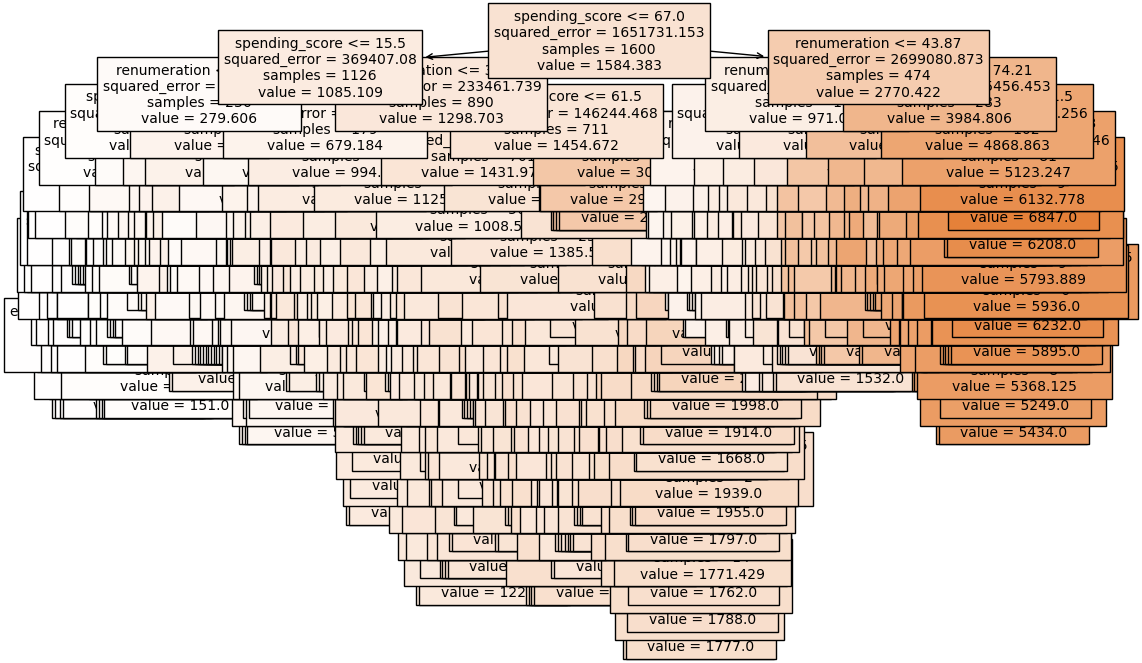

In [139]:
# Step 7: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=['age',
 'renumeration',
 'spending_score',
 'product',
 'gender_Male',
 'education_PhD',
 'education_diploma',
 'education_graduate',
 'education_postgraduate'], fontsize=10)
plt.show()

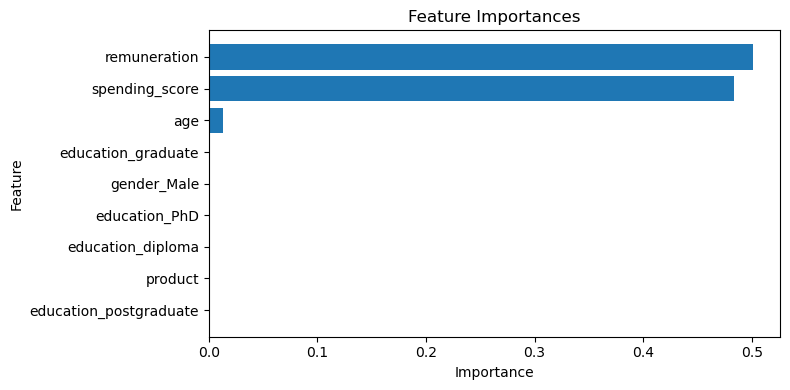

In [141]:
# Extract feature importances
feature_importances = df2.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_cols, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

### Creating new decision tree regresor after runing feature importances.

In [145]:
# Create your new DataFrame.
df20 = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
df20.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [146]:
# Check the column names of the DataFrame
print(df20.columns)

# Drop unnecessary columns if they exist
columns_to_drop = ['review', 'summary']
existing_columns_to_drop = [col for col in columns_to_drop if col in df20.columns]
df20 = df20.drop(columns=existing_columns_to_drop)

# View the updated DataFrame
print(df20)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')
      gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998 

In [147]:
# Rename columns
df20 = df20.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'})

# View column names.
print(df20)

      gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

     language platform  product  
0          EN      Web      453  
1      

In [148]:
df20.info

<bound method DataFrame.info of       gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

     language platform  product  
0        

In [150]:
# Encode categorical variables using get_dummies
# remember, leave the numerical columns
categorical_cols = ['gender', 'education', 'language', 'platform']
df20 = pd.get_dummies(df20, columns=categorical_cols, drop_first=True)

In [154]:
df20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     2000 non-null   int64  
 1   remuneration            2000 non-null   float64
 2   spending_score          2000 non-null   int64  
 3   loyalty_points          2000 non-null   int64  
 4   product                 2000 non-null   int64  
 5   gender_Male             2000 non-null   bool   
 6   education_PhD           2000 non-null   bool   
 7   education_diploma       2000 non-null   bool   
 8   education_graduate      2000 non-null   bool   
 9   education_postgraduate  2000 non-null   bool   
dtypes: bool(5), float64(1), int64(4)
memory usage: 88.0 KB


In [155]:
# Specify Y.
y = df20['loyalty_points'] # just our target variable

# Specify X.
x = df20[['spending_score', 'remuneration', 'age']] #all features other than our target variable

In [156]:
y

0        210
1        524
2         40
3        562
4        366
        ... 
1995    4031
1996     539
1997    5614
1998    1048
1999     479
Name: loyalty_points, Length: 2000, dtype: int64

In [157]:
feature_cols = [c for c in x.columns]  
feature_cols

['spending_score', 'remuneration', 'age']

In [158]:
# Split the data into test and train data.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [159]:
# Create the 'DecisionTreeRegressor' class 
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor object to the data set.
regressor.fit(x_train,y_train) 

DecisionTreeRegressor(random_state=42)

In [160]:
# Make predictions
y_pred = regressor.predict(x_test)

y_pred

array([  62., 3398., 2750., 1122., 1622., 1605.,  266.,  994., 1060.,
       3634., 1338., 1777., 1752., 2235.,  696., 1430., 1675.,  463.,
        406.,   67., 1504.,  338.,  969., 1424., 1435., 1248., 4747.,
       1344.,  500., 1151.,  515.,  443.,  499., 1756., 1651., 1328.,
       1165., 1658., 1281., 1177.,  926., 1623., 1395., 5084., 5434.,
        238., 1756., 1622., 1322., 1529.,  871.,  942.,  904.,  179.,
       1601.,  996.,  664., 5249.,  881., 3285., 1404., 1281., 1098.,
       1622., 1048.,  649., 3636.,  221., 1222., 1585., 1328., 4320.,
       5377., 1177., 3478.,  926., 1492., 3636., 1347.,  334., 1232.,
       1014., 1282.,  871., 1267., 1605.,  478., 1281., 1703., 1129.,
       4944., 1278.,  138., 1503.,  133.,   60., 1395., 1042.,  952.,
       1232., 1547., 5895., 1151.,  648., 1159., 1379.,  476., 1338.,
       1067.,  443., 3455., 1860., 1637., 1010., 3015.,  881., 1673.,
       4588.,  925., 1059.,  236.,  338., 1756., 1376., 5895., 4968.,
       1355., 1998.,

In [161]:
from sklearn import metrics

# Specify to print the MAE and MSE (to evaluate the accuracy of the new model).
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error:  20.69
Mean Squared Error:  3514.77


In [162]:
# Create your decision tree regressor.
df2 =  DecisionTreeRegressor(random_state=42)

# Train Decision Tree regressor
df2.fit(x_train, y_train)

# Predict y on test data
y_pred = df2.predict(x_test)

In [163]:
y_pred

array([  62., 3398., 2750., 1122., 1622., 1605.,  266.,  994., 1060.,
       3634., 1338., 1777., 1752., 2235.,  696., 1430., 1675.,  463.,
        406.,   67., 1504.,  338.,  969., 1424., 1435., 1248., 4747.,
       1344.,  500., 1151.,  515.,  443.,  499., 1756., 1651., 1328.,
       1165., 1658., 1281., 1177.,  926., 1623., 1395., 5084., 5434.,
        238., 1756., 1622., 1322., 1529.,  871.,  942.,  904.,  179.,
       1601.,  996.,  664., 5249.,  881., 3285., 1404., 1281., 1098.,
       1622., 1048.,  649., 3636.,  221., 1222., 1585., 1328., 4320.,
       5377., 1177., 3478.,  926., 1492., 3636., 1347.,  334., 1232.,
       1014., 1282.,  871., 1267., 1605.,  478., 1281., 1703., 1129.,
       4944., 1278.,  138., 1503.,  133.,   60., 1395., 1042.,  952.,
       1232., 1547., 5895., 1151.,  648., 1159., 1379.,  476., 1338.,
       1067.,  443., 3455., 1860., 1637., 1010., 3015.,  881., 1673.,
       4588.,  925., 1059.,  236.,  338., 1756., 1376., 5895., 4968.,
       1355., 1998.,

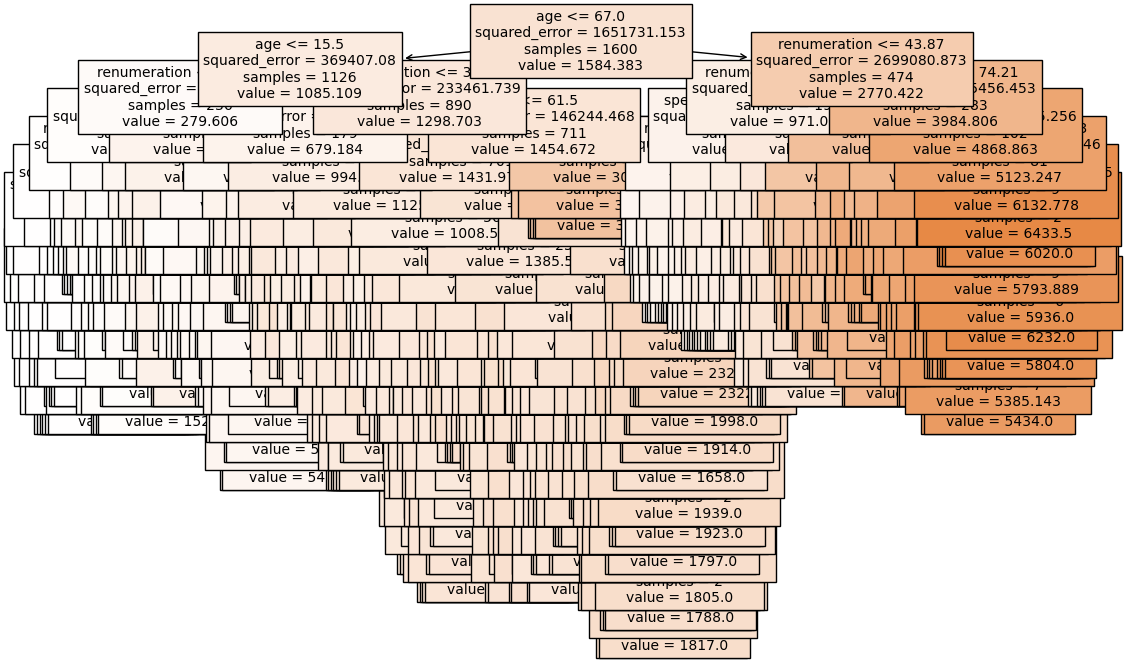

In [164]:
# Step 7: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True, feature_names=['age',
 'renumeration',
 'spending_score'
 ], fontsize=10)
plt.show()

In [165]:
from sklearn.metrics import mean_squared_error

# Prune the model.
# Create and train the DecisionTreeRegressor with max_depth for pruning
dtc = DecisionTreeRegressor(max_depth=5, random_state=42)  # Adjust max_depth as needed
dtc.fit(x_train, y_train)

# Predict on test data
y_pred = dtc.predict(x_test)

# Evaluate the model using Mean Squared Error
mse_pruning = mean_squared_error(y_test, y_pred)
print("Mean Squared Error with pruning:", mse_pruning)

Mean Squared Error with pruning: 77490.46114717465


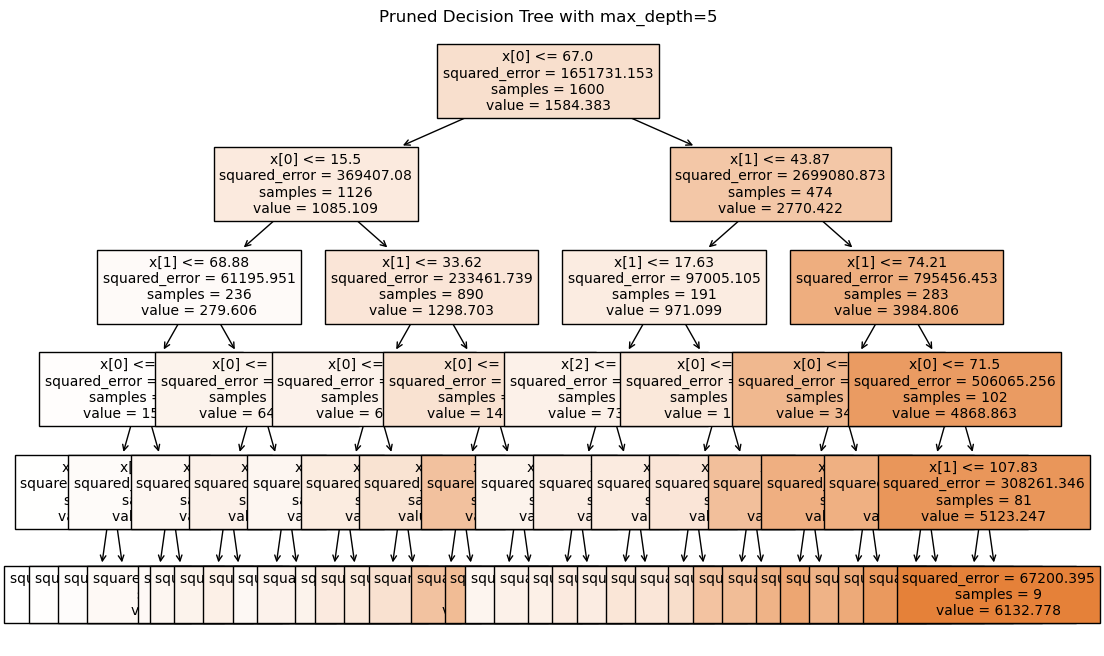

In [166]:
# Visualize the pruned decision tree
plt.figure(figsize=(12, 8))
plot_tree(dtc, filled=True, fontsize=10)
plt.title("Pruned Decision Tree with max_depth=5")
plt.show()

## 5. Insights and observations



Feature importance code suggested that only 3 columns (remuneration, age and spending score) are affecting loyalty points. 

Interpretation:
Before Pruning (MSE: 3514.77):

The lower MSE indicates that the model was able to fit the training data quite well.
However, this also suggests that the model might be overfitting, capturing not only the underlying patterns but also the noise in the training data.

After Pruning (MSE: 77490.46):

The significantly higher MSE indicates that the pruned model is not performing well on the test data.
Pruning generally helps in reducing overfitting by simplifying the model, but in this case, it seems to have removed too much information, leading to underfitting.

Conclusion:
The drastic increase in MSE after pruning suggests that the pruning process was too aggressive, resulting in a model that is too simple to capture the underlying relationships in the data.


# 

# Week 3 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df3`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [167]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [168]:
# Load the CSV file(s) as df2.

df10 = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
df10.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [169]:
# Drop unnecessary columns.

# Keep necessary columns. Drop unnecessary columns.
# Drop all columns except 'review' and 'summary'
columns_to_keep = ['remuneration (k£)', 'spending_score (1-100)']
df10 = df10[columns_to_keep]

# Display the updated DataFrame
print(df10)


      remuneration (k£)  spending_score (1-100)
0                 12.30                      39
1                 12.30                      81
2                 13.12                       6
3                 13.12                      77
4                 13.94                      40
...                 ...                     ...
1995              84.46                      69
1996              92.66                       8
1997              92.66                      91
1998              98.40                      16
1999              92.66                       8

[2000 rows x 2 columns]


In [170]:
# Explore the data.
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   remuneration (k£)       2000 non-null   float64
 1   spending_score (1-100)  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [171]:
df10.describe()

remuneration (k£)  spending_score (1-100)
count        2000.000000             2000.000000
mean           48.079060               50.000000
std            23.123984               26.094702
min            12.300000                1.000000
25%            30.340000               32.000000
50%            47.150000               50.000000
75%            63.960000               73.000000
max           112.340000               99.000000

## 2. Plot

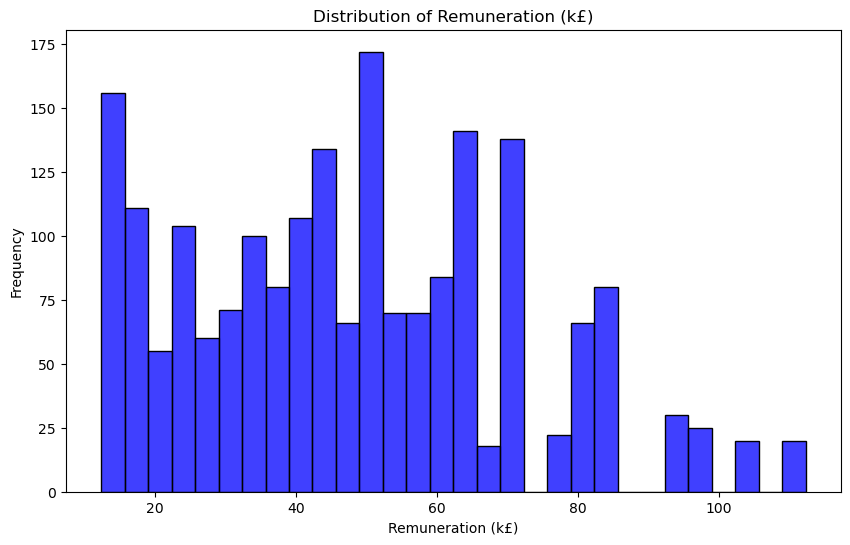

In [172]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(df10['remuneration (k£)'], bins=30, kde=False, color='blue')

# Set the title and labels
plt.title('Distribution of Remuneration (k£)')
plt.xlabel('Remuneration (k£)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

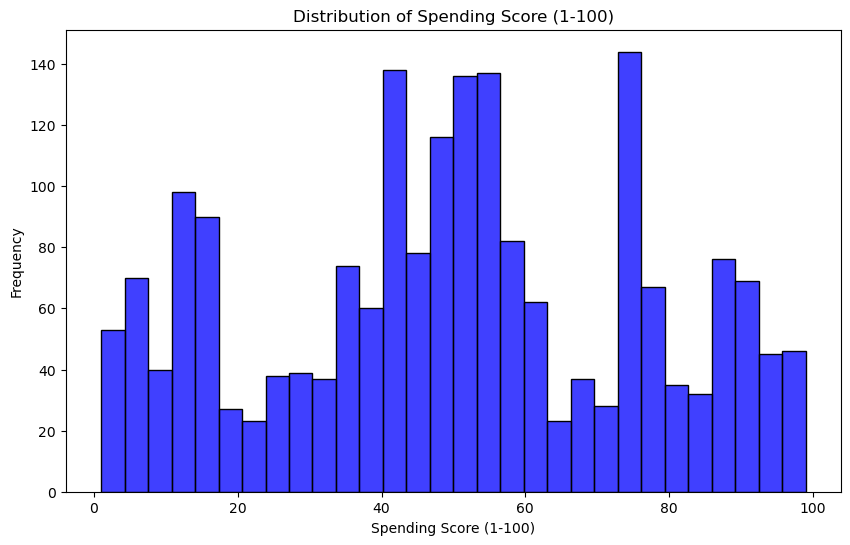

In [173]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the histogram
sns.histplot(df10['spending_score (1-100)'], bins=30, kde=False, color='blue')

# Set the title and labels
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

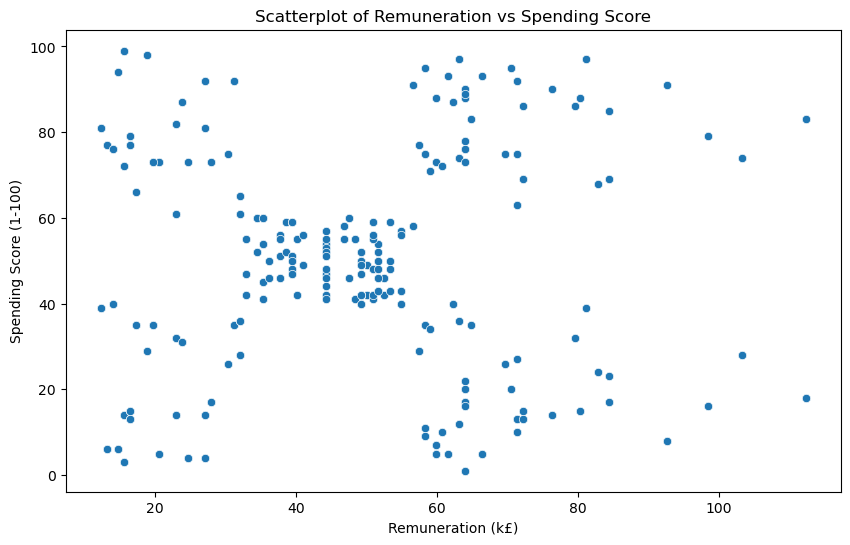

In [174]:
# Create a scatterplot with Seaborn.

# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remuneration (k£)', y='spending_score (1-100)', data=df10)

# Set the title and labels
plt.title('Scatterplot of Remuneration vs Spending Score')
plt.xlabel('Remuneration (k£)')
plt.ylabel('Spending Score (1-100)')

# Show the plot
plt.show()

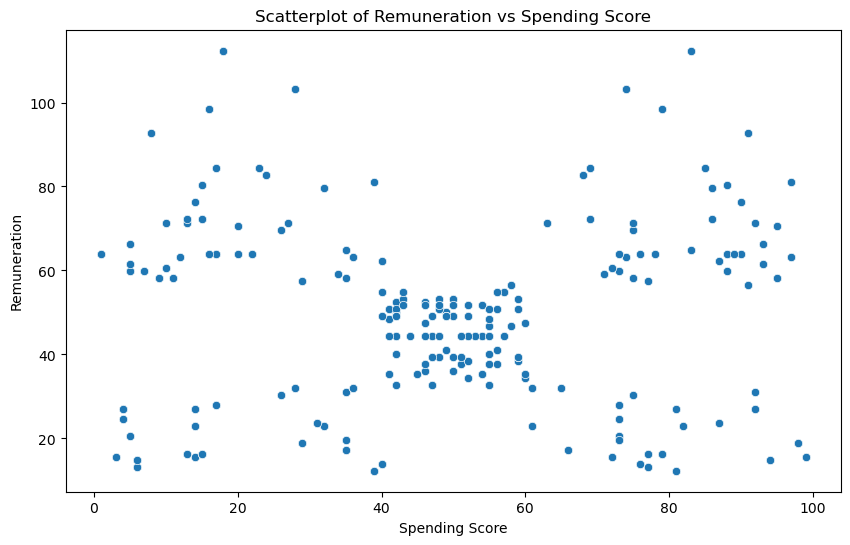

In [175]:
# Create a scatterplot with Seaborn.

# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='spending_score (1-100)', y='remuneration (k£)', data=df10)

# Set the title and labels
plt.title('Scatterplot of Remuneration vs Spending Score')
plt.xlabel('Spending Score')
plt.ylabel('Remuneration')

# Show the plot
plt.show()

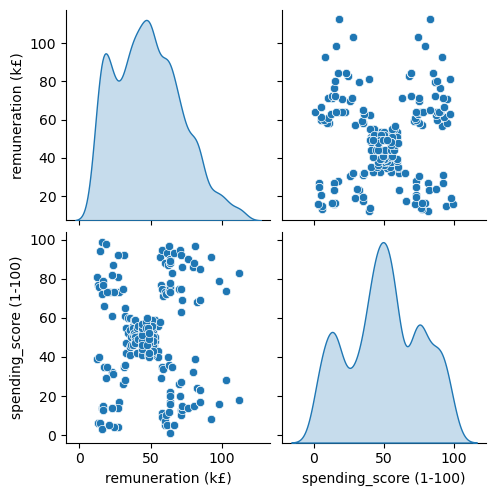

In [176]:
# Create a pairplot with Seaborn.

# Pairplot
sns.pairplot(df10, vars=['remuneration (k£)', 'spending_score (1-100)'], diag_kind='kde')

# Show the plot
plt.show()

In [177]:
# Let's look at clustering on these two features

#We take just the Annual Income and Spending score
X=df10[['remuneration (k£)', 'spending_score (1-100)']]
#The input data
X.head()

remuneration (k£)  spending_score (1-100)
0              12.30                      39
1              12.30                      81
2              13.12                       6
3              13.12                      77
4              13.94                      40

## 3. Elbow and silhoutte methods

In [178]:
# Determine the number of clusters: Elbow method.
wcss=[]
k_range = range(1, 11)

for k in k_range:
    km = KMeans(n_clusters=k, n_init=10) 
    km.fit(df10)
    wcss.append(km.inertia_)

wcss

[2430088.5950328,
 1526644.3470264112,
 1006659.3689455048,
 633387.567730502,
 348507.3568197285,
 302096.8179823201,
 257681.54083461233,
 215370.70143800546,
 182885.02302063472,
 163359.70243294584]

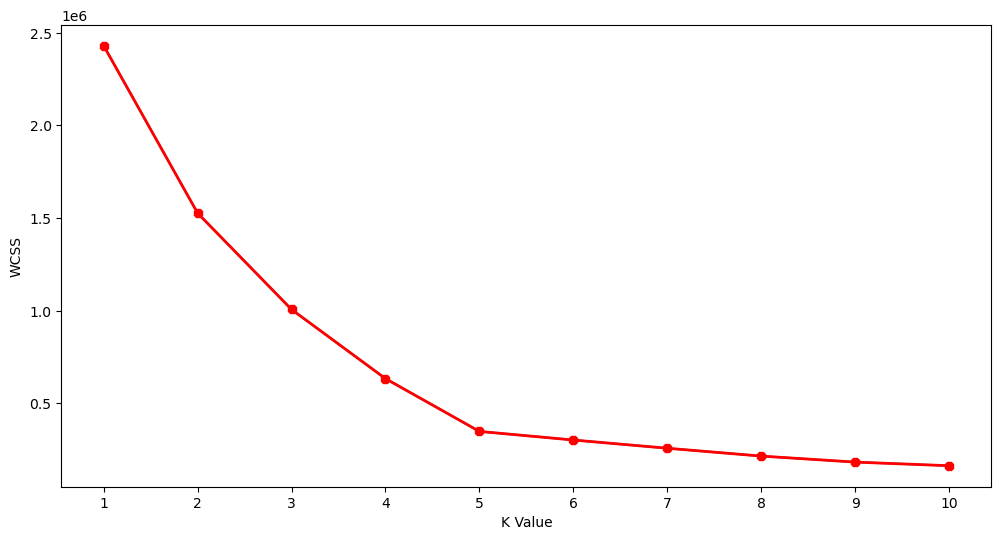

In [179]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()


### Optimal number of clusters is 5.

In [180]:
# Determine the number of clusters: Silhouette method.

# Create an empty list to store silhouette scores
silhouette_scores = []

# Loop through different values of k
for k in range(2, 11):
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(df10)
    y_pred = km.predict(df10)
    
    silhouette_avg = silhouette_score(df10, y_pred)
    silhouette_scores.append(silhouette_avg)
    
silhouette_scores

[0.32585975974643555,
 0.4565233708396992,
 0.5121777811595611,
 0.5834953298348279,
 0.5626776463269844,
 0.5428100636319477,
 0.5216067827414238,
 0.4645085347836589,
 0.4598609820964617]

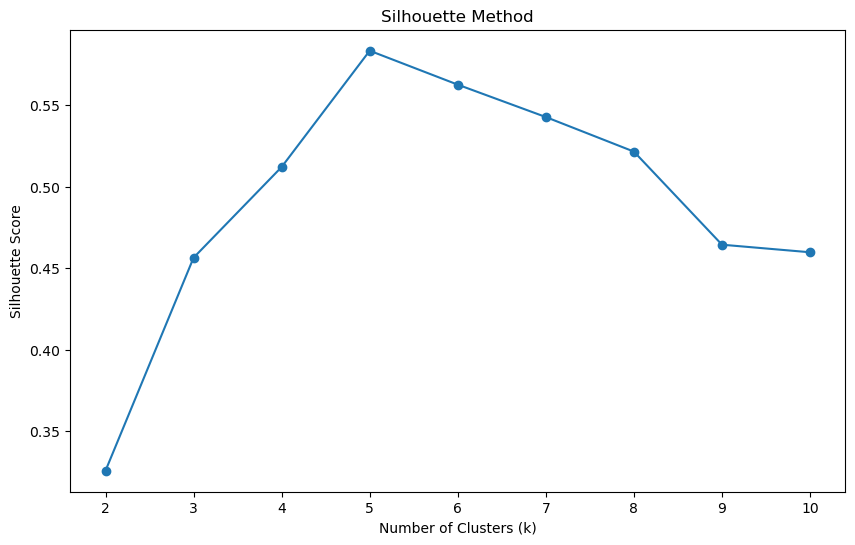

In [181]:
# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.show()

## 4. Evaluate k-means model at different values of *k*

In [182]:
# Now, let's take 5 clusters
km1 = KMeans(n_clusters=5, n_init=10)

# Fitting the input data
km1.fit(X) # Remember X is the dataframe showing just Spending Score and Age 

# Predicting the clusters of the input data
y = km1.predict(X)

In [183]:
y

array([4, 0, 4, ..., 3, 2, 2])

## 5. Fit final model and justify your choice

In [184]:
# Add cluster labels to the DataFrame
df10['label'] = y
df10

remuneration (k£)  spending_score (1-100)  label
0                 12.30                      39      4
1                 12.30                      81      0
2                 13.12                       6      4
3                 13.12                      77      0
4                 13.94                      40      4
...                 ...                     ...    ...
1995              84.46                      69      3
1996              92.66                       8      2
1997              92.66                      91      3
1998              98.40                      16      2
1999              92.66                       8      2

[2000 rows x 3 columns]

In [185]:
df10["label"].unique()

array([4, 0, 1, 3, 2])

## 6. Plot and interpret the clusters

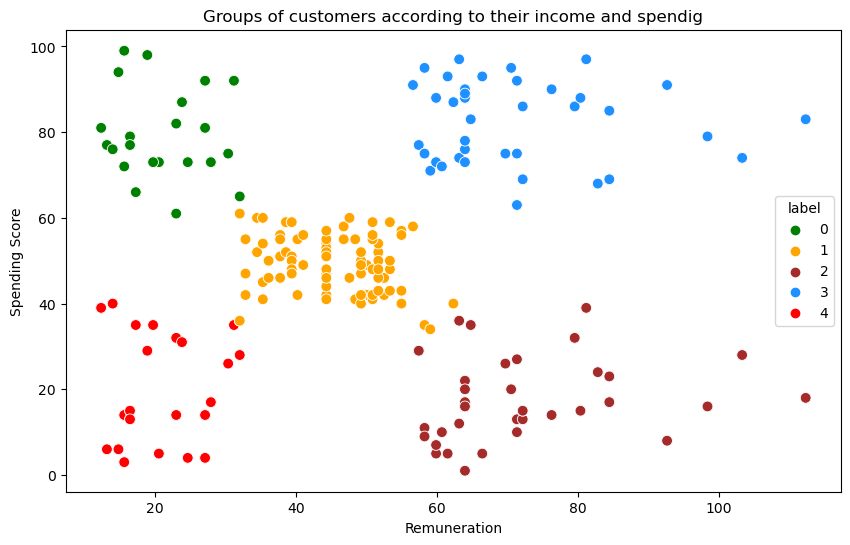

In [186]:
# Scatterplot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='remuneration (k£)', y='spending_score (1-100)', hue='label',
                palette=['green', 'orange', 'brown', 'dodgerblue', 'red'],
                legend='full', data=df10, s=60)
plt.xlabel('Remuneration')
plt.ylabel('Spending Score')
plt.title('Groups of customers according to their income and spendig')
plt.show()

### Observations:
We have 5 groups of customers. 
"Yellow" are customers who earn from 60k£ to above 100k£ and they do not like spending a lot. To attract this customers marketing team could introduce special loyalty cards to encourage to spend more.
"Red" - customers who earn a lot and spend a lot. Turtle games could offer them some special/ high standard products. 
"Green" - customers who earn between 30-60k£ and spent relatively good money in Turtle Games. Offering mid range products with wide variety could attract this group.
"Blue" - customer who earn not a lot and spend accordingly. Offering dicounts and bonuses could attract this group.
"Brown" - Customer who earn 0-30k£ and spend relatively a lot. Offering flexible payment options, sale events, and value bundles could attract this segment.

# 

# Week 4 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [187]:
!pip install wordcloud nltk pandas numpy matplotlib textblob scipy

# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [188]:
# Load the data set as df3.
df6 = pd.read_csv('modified_reviews.csv')

# View DataFrame.
df6

gender  age  renumeration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                             review  \
0         453  When it comes to a DM's screen, the space on t...   
1         466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2         254  Nice art, nice printing.  Why two panels are f...   
3         263  Amazing buy! Bought it as a gift for our new d...   
4         291  As my review of GF9's previous screens these w...   
...       ...                                                ...   
1995      977  The perfect word game for mixed ages (with Mom...   
1996      979  Great game.  Did not think I would like it whe...   
1997     1012  Great game for all.........\nKeeps the mind ni...   
1998     1031                                          fun game!   
1999      453  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 9 columns]

In [189]:
df6.dtypes

gender             object
age                 int64
renumeration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object

In [190]:
# Explore data set.
df6.columns

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')

In [191]:
# Keep necessary columns. Drop unnecessary columns.
# Drop all columns except 'review' and 'summary'
columns_to_keep = ['review', 'summary']
df6 = df6[columns_to_keep]

# Display the updated DataFrame
print(df6)

# View DataFrame.


                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4

In [192]:
# Determine if there are any missing values.
missing_values = df6.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

review     0
summary    0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [193]:
# Review: Change all to lower case and join with a space.
# Convert all text in 'review' and 'summary' to lowercase
df6['review'] = df6['review'].str.lower()
df6['summary'] = df6['summary'].str.lower()

# Join the 'review' and 'summary' columns into a single string with a space
df6['combined_text'] = df6['review'] + ' ' + df6['summary']

# Display the updated DataFrame
print(df6[['review', 'summary', 'combined_text']])

                                                 review  \
0     when it comes to a dm's screen, the space on t...   
1     an open letter to galeforce9*:\n\nyour unpaint...   
2     nice art, nice printing.  why two panels are f...   
3     amazing buy! bought it as a gift for our new d...   
4     as my review of gf9's previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages (with mom...   
1996  great game.  did not think i would like it whe...   
1997  great game for all.........\nkeeps the mind ni...   
1998                                          fun game!   
1999  this game is fun. a lot like scrabble without ...   

                                                summary  \
0     the fact that 50% of this space is wasted on a...   
1     another worthless dungeon master's screen from...   
2                       pretty, but also pretty useless   
3                                            five stars

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [194]:
# Replace all the punctuations in review column.
import pandas as pd
import string

# Function to replace all punctuations
def replace_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function to the 'review' column
df6['review'] = df6['review'].apply(replace_punctuation)

# Display the updated DataFrame
print(df6)

                                                 review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9\n\nyour unpainted...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997          great game for all\nkeeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50% of this space is wasted on a...   
1     another worthless dungeon master's screen from...   
2                       pretty, but also pretty useless   
3                                            five stars

In [195]:
# Replace all the puncuations in summary column.

# Apply the function to the 'summary' column
df6['summary'] = df6['summary'].apply(replace_punctuation)

# Display the updated DataFrame
print(df6)


                                                 review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9\n\nyour unpainted...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997          great game for all\nkeeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars

### 2c) Drop duplicates in both columns

In [196]:
# Drop duplicates in both columns.

# Drop duplicates in both columns
df6.drop_duplicates(subset=['review', 'summary'], keep='first', inplace=True)

# Display the updated DataFrame
print(df6)

                                                 review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9\n\nyour unpainted...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997          great game for all\nkeeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars

## 3. Tokenise and create wordclouds

In [197]:
# Create new DataFrame (copy DataFrame).
df6_copy = df6.copy()

# View DataFrame.
df6_copy

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9\n\nyour unpainted...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997          great game for all\nkeeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  \
0     the fact that 50 of this space is wasted on ar...   
1     another worthless dungeon masters screen from ...   
2                        pretty but also pretty useless   
3                                            five stars   
4                                            money trap   
...                                                 ...   
1995      the perfect word game for mixed ages with mom   
1996                                          super fun   
1997                                         great game   
1998                                         four stars   
1999                                     love this game   

                                          combined_text  
0     when it comes to a dm's screen, the space on t...  
1     an open letter to galeforce9*:\n\nyour unpaint...  
2     nice art, nice printing.  why two panels are f...  
3     amazing buy! bought it as a gift for our new d...  
4     as my review of gf9's previous screens these w...  
...                                                 ...  
1995  the perfect word game for mixed ages (with mom...  
1996  great game.  did not think i would like it whe...  
1997  great game for all.........\nkeeps the mind ni...  
1998                               fun game! four stars  
1999  this game is fun. a lot like scrabble without ...  

[1961 rows x 3 columns]

In [198]:
# Apply tokenisation to both columns.
# Split up each comment into individual words
# Apply tokenization using list comprehension
df7 = {col: [word_tokenize(text) for text in df6[col]] for col in df6}

# Display the tokenized DataFrame
df7

{'review': [['when',
   'it',
   'comes',
   'to',
   'a',
   'dms',
   'screen',
   'the',
   'space',
   'on',
   'the',
   'screen',
   'itself',
   'is',
   'at',
   'an',
   'absolute',
   'premium',
   'the',
   'fact',
   'that',
   '50',
   'of',
   'this',
   'space',
   'is',
   'wasted',
   'on',
   'art',
   'and',
   'not',
   'terribly',
   'informative',
   'or',
   'needed',
   'art',
   'as',
   'well',
   'makes',
   'it',
   'completely',
   'useless',
   'the',
   'only',
   'reason',
   'that',
   'i',
   'gave',
   'it',
   '2',
   'stars',
   'and',
   'not',
   '1',
   'was',
   'that',
   'technically',
   'speaking',
   'it',
   'can',
   'at',
   'least',
   'still',
   'stand',
   'up',
   'to',
   'block',
   'your',
   'notes',
   'and',
   'dice',
   'rolls',
   'other',
   'than',
   'that',
   'it',
   'drops',
   'the',
   'ball',
   'completely'],
  ['an',
   'open',
   'letter',
   'to',
   'galeforce9',
   'your',
   'unpainted',
   'miniatures',
  

In [199]:
# Review: Create a word cloud.

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a DataFrame df7 from the tokenized data
df7 = pd.DataFrame({
    'review': [word_tokenize(text) for text in df6['review']],
    'summary': [word_tokenize(text) for text in df6['summary']]
})
# Combine tokens from both columns into a single list
all_tokens = []
for col in ['review', 'summary']:
    all_tokens.extend(df7[col].explode().tolist())

# Convert tokens list to string for word cloud input
text = ' '.join(all_tokens)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

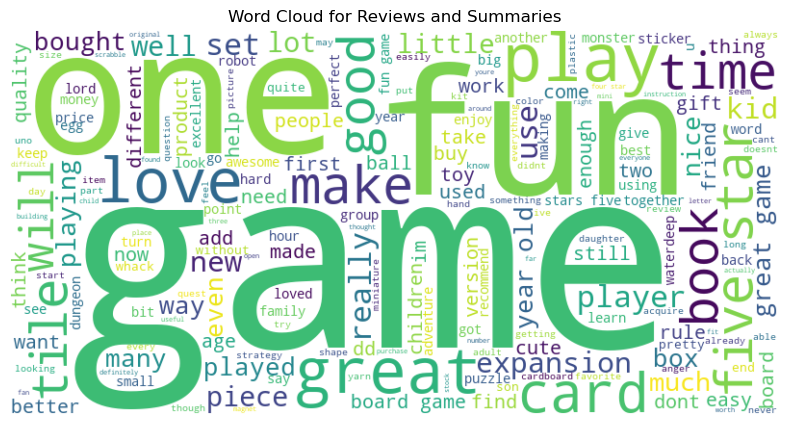

In [202]:
# Review: Plot the WordCloud image.

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Reviews and Summaries')
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [203]:
# Determine the frequency distribution.

# Calculate frequency distribution
freq_dist = FreqDist(all_tokens)

# Print the most common words
print(freq_dist.most_common(10))

[('the', 5712), ('and', 3401), ('a', 3400), ('to', 3354), ('of', 2627), ('it', 2233), ('i', 2176), ('game', 1990), ('this', 1911), ('is', 1885)]


### 4b) Remove alphanumeric characters and stopwords

In [204]:
# Delete all the alpanum.

# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))

# Filter tokens: remove stopwords and alphanumeric tokens
filtered_tokens = [
    token for token in all_tokens
    if token.lower() not in stop_words and
    token.isalpha()
]

# Print the most common words
print(freq_dist.most_common(10))

[('the', 5712), ('and', 3401), ('a', 3400), ('to', 3354), ('of', 2627), ('it', 2233), ('i', 2176), ('game', 1990), ('this', 1911), ('is', 1885)]


### 4c) Create wordcloud without stopwords

In [205]:
# Create a wordcloud without stop words.

# Join the filtered tokens back into a single string
filtered_text = ' '.join(filtered_tokens)

# Generate the word cloud
wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(filtered_text)


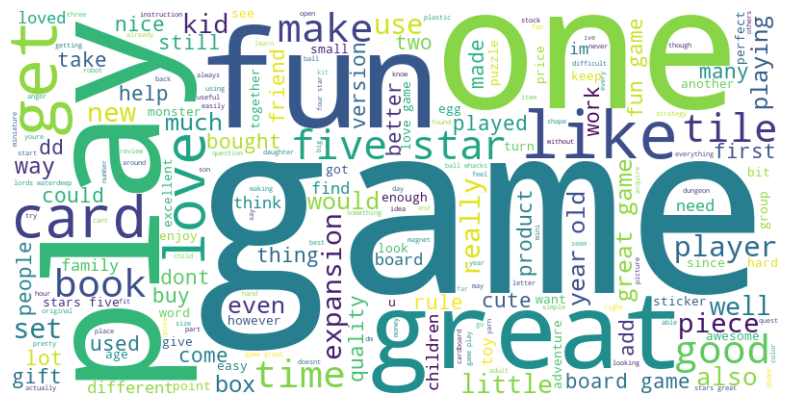

In [206]:
# Plot the wordcloud image

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 4d) Identify 15 most common words and polarity

In [207]:
# Determine the 15 most common words.

# Identify the 15 most common words
most_common_words = freq_dist.most_common(15)
print(freq_dist.most_common(15))

[('the', 5712), ('and', 3401), ('a', 3400), ('to', 3354), ('of', 2627), ('it', 2233), ('i', 2176), ('game', 1990), ('this', 1911), ('is', 1885), ('for', 1777), ('with', 1336), ('you', 1223), ('in', 1188), ('that', 1095)]


### Observations:
Word cloud image and 15 most common words shows that customers very often used a positive words about Turtle Games company and about their service.

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [208]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [209]:
# Determine polarity of both columns. 

# Assuming df6 is the DataFrame with 'review' and 'summary' columns
# Apply the function to both columns
df6['review_polarity'] = df6['review'].apply(generate_polarity)
df6['summary_polarity'] = df6['summary'].apply(generate_polarity)

# Display the DataFrame with the new polarity columns
print(df6[['review', 'review_polarity', 'summary', 'summary_polarity']])

# Analyze the polarity scores
print("Review Polarity - Mean:", df6['review_polarity'].mean())
print("Summary Polarity - Mean:", df6['summary_polarity'].mean())
print("Review Polarity - Std Dev:", df6['review_polarity'].std())
print("Summary Polarity - Std Dev:", df6['summary_polarity'].std())

# Optionally, visualize the polarity scores
import matplotlib.pyplot as plt


# View output.


                                                 review  review_polarity  \
0     when it comes to a dms screen the space on the...        -0.036111   
1     an open letter to galeforce9\n\nyour unpainted...         0.035952   
2     nice art nice printing  why two panels are fil...         0.116640   
3     amazing buy bought it as a gift for our new dm...         0.578788   
4     as my review of gf9s previous screens these we...        -0.316667   
...                                                 ...              ...   
1995  the perfect word game for mixed ages with mom ...         0.168750   
1996  great game  did not think i would like it when...         0.158333   
1997          great game for all\nkeeps the mind nimble         0.200000   
1998                                           fun game        -0.050000   
1999  this game is fun a lot like scrabble without a...        -0.095833   

                                                summary  summary_polarity  
0     the f

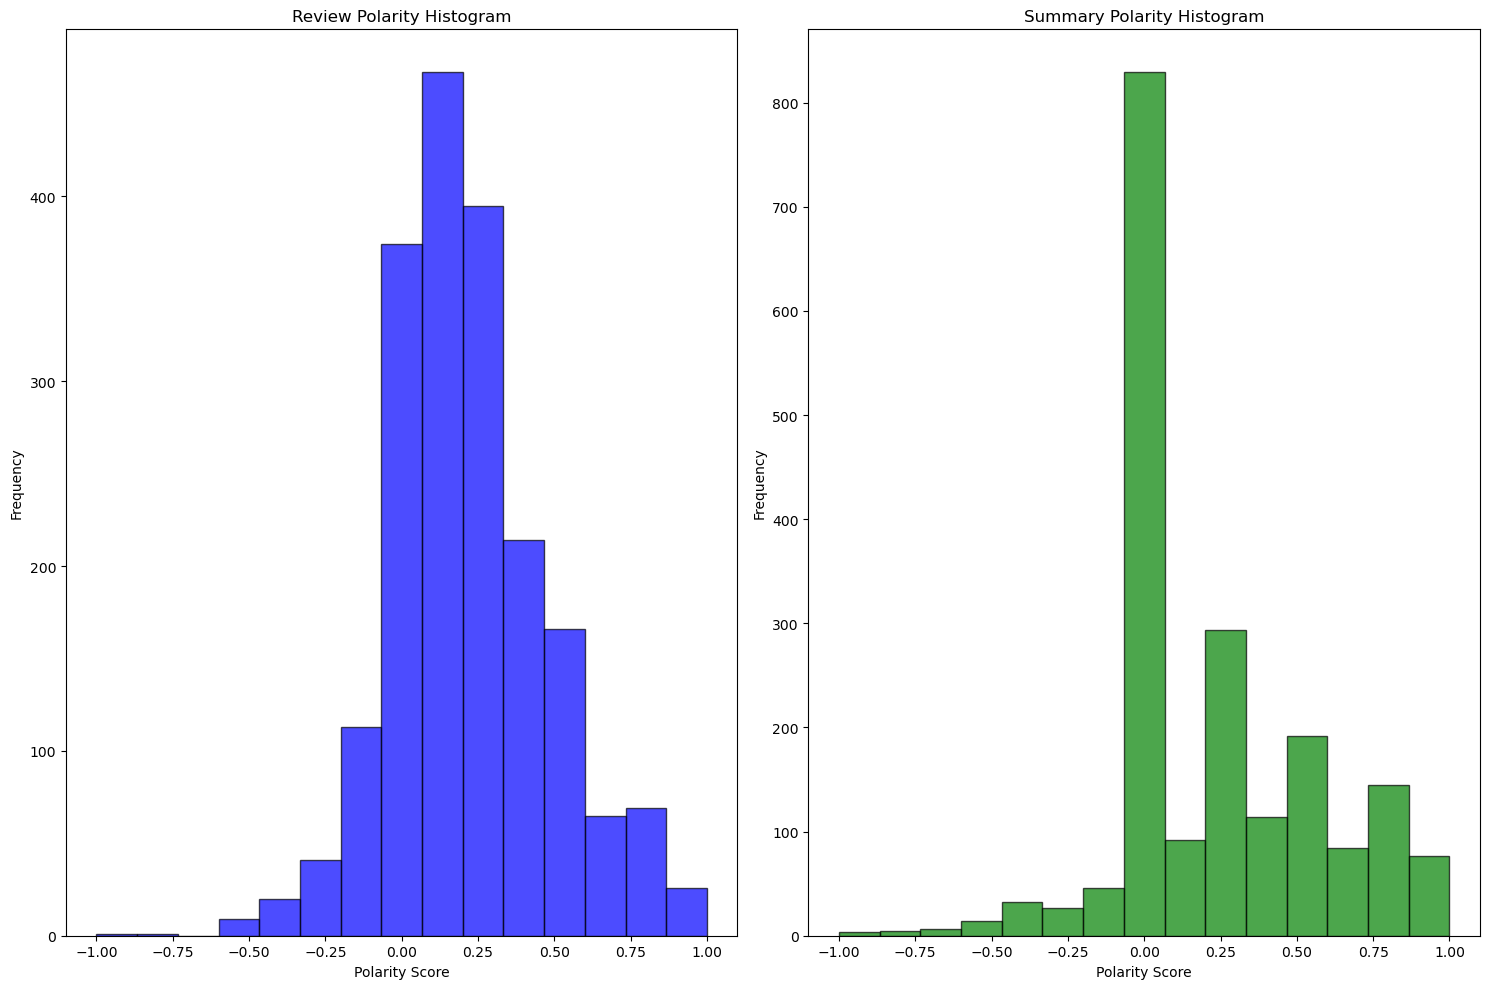

In [210]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

# Histogram for review polarity
plt.subplot(1, 2, 1)
plt.hist(df6['review_polarity'], bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title('Review Polarity Histogram')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')

# Histogram for summary polarity
plt.subplot(1, 2, 2)
plt.hist(df6['summary_polarity'], bins=15, alpha=0.7, color='green', edgecolor='black')
plt.title('Summary Polarity Histogram')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


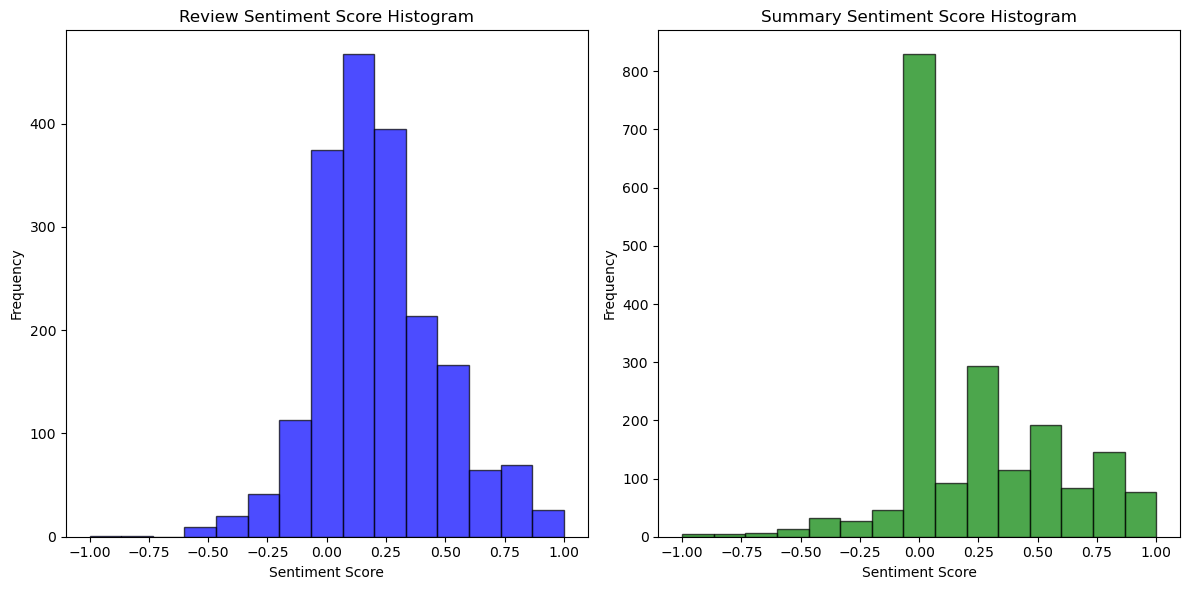

In [211]:
# Histogram of sentiment score

plt.figure(figsize=(12, 6))

# Histogram for review sentiment scores
plt.subplot(1, 2, 1)
plt.hist(df6['review_polarity'], bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.title('Review Sentiment Score Histogram')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

# Histogram for summary sentiment scores
plt.subplot(1, 2, 2)
plt.hist(df6['summary_polarity'], bins=15, alpha=0.7, color='green', edgecolor='black')
plt.title('Summary Sentiment Score Histogram')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Observations: 
Polarity and sentiment scores from both columns suggests that it is more positive or neutral and that customers think rather positively about company Turtle Games.

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [212]:
# Top 20 negative reviews.

# Sort the dataframe by 'review_polarity' in descending order
top_negative_reviews = df6.sort_values(by='review_polarity').head(20)

# Print the top 20 negative reviews
print(top_negative_reviews[['review', 'review_polarity']])


                                                 review  review_polarity
208   booo  unles you are patient know how to measur...        -1.000000
182                  incomplete kit  very disappointing        -0.780000
1804  im sorry i just find this product to be boring...        -0.583333
364   one of my staff will be using this game soon s...        -0.550000
1524                         expensive for what you get        -0.500000
117   i bought this as a christmas gift for my grand...        -0.500000
230                    i found the directions difficult        -0.500000
290              instructions are complicated to follow        -0.500000
301                                           difficult        -0.500000
227   this was a gift for my daughter  i found it di...        -0.500000
174   i sent this product to my granddaughter the po...        -0.491667
347   my 8 yearold granddaughter and i were very fru...        -0.446250
538   i purchased this on the recommendation of two

In [213]:
# Top 20 negative summaries.
top_negative_summaries = df6.sort_values(by='summary_polarity').head(20)

# Print the top 20 negative summaries
print(top_negative_summaries[['summary', 'summary_polarity']])


                                                summary  summary_polarity
208    boring unless you are a craft person which i am          -1.000000
21                        the worst value ive ever seen         -1.000000
829                                              boring         -1.000000
1166  before this i hated running any rpg campaign d...         -0.900000
1     another worthless dungeon masters screen from ...         -0.800000
793                                        disappointed         -0.750000
1620                                       disappointed         -0.750000
144                                        disappointed         -0.750000
631                                        disappointed         -0.750000
363   promotes anger instead of teaching calming met...         -0.700000
885            too bad this is not what i was expecting         -0.700000
890                        bad qualityall made of paper         -0.700000
178     at age 31 i found these very d

In [214]:
# Top 20 positive reviews.
# Sort the dataframe by 'review_polarity' in descending order to get the most positive first
top_positive_reviews = df6.sort_values(by='review_polarity', ascending=False).head(20)

# Print the top 20 positive reviews
print(top_positive_reviews[['review', 'review_polarity']])


                                                 review  review_polarity
790                                             perfect              1.0
1726                  excellent toy to simulate thought              1.0
194                                        awesome gift              1.0
1967       perfect for tutoring my grandson in spelling              1.0
1177               awesome addition to my rpg gm system              1.0
1168               best set buy 2 if you have the means              1.0
524                         perfect just what i ordered              1.0
1715                                        awesome toy              1.0
1720  it is the best thing to play with and also min...              1.0
621   wonderful for my grandson to learn the resurre...              1.0
1135                                        awesome set              1.0
1609  this was perfect to go with the 7 bean bags  i...              1.0
1401  one of the best board games i played in along

In [215]:
# Top 20 positive summaries.
# Sort the dataframe by 'summary_polarity' in descending order to get the most positive first
top_positive_summaries = df6.sort_values(by='summary_polarity', ascending=False).head(20)

# Print the top 20 positive summaries
print(top_positive_summaries[['summary', 'summary_polarity']])


                                               summary  summary_polarity
1028                                   one of the best               1.0
1935                                         excellent               1.0
815                         one of the best games ever               1.0
1630                             awesome learning tool               1.0
163                    he was very happy with his gift               1.0
1170                               best orcs from wotc               1.0
1388                                 awesome expansion               1.0
1078                                      perfect gift               1.0
140             awesome sticker activity for the price               1.0
1171                                           awesome               1.0
647                                          wonderful               1.0
651              all f the mudpuppy toys are wonderful               1.0
1488  the perfect gift for preschool construction f

# 